# EDA

#### 20240726_Rockhead_Seoul(False_coordinate_sys).csv

## columns info

- 앞으로 추가될 comlumns
    - 지질 시대
    - DEM 경사
    - 지형 정보(강, 산 ...)


|column name|Description|test input|
|---|---|---|
|borehole_code|시추공 코드|X|
|x|위도|O|
|y|경도|O|
|Elevation|표고|O|
|depth_start|rockhead 시작 심도|output|
|depth_end|rockhead 종료 심도|X|
|Ground name|지반명- WR: 풍화암, SR: 연암, MR: 보통암, HR: 경암|X|
|Density|1km^2당 시추공 밀도|O|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#data load
csv = pd.read_csv('data/240726_Rockhead_Seoul(False_coordinate_sys).csv')
df_row = pd.DataFrame(csv)

## Data check
- info
- distribution

In [3]:
df_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20369 entries, 0 to 20368
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   borehole_code  20369 non-null  int64  
 1   x              20369 non-null  float64
 2   y              20369 non-null  float64
 3   elevation      20369 non-null  float64
 4   depth_start    20369 non-null  float64
 5   depth_end      20369 non-null  float64
 6   Ground name    20369 non-null  object 
 7   Density        20369 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.2+ MB


In [4]:
df_row['Ground name'].unique()

array(['WR', 'SR', 'MR', 'HR'], dtype=object)

In [5]:
df_row.describe().T

,count,mean,std,min,25%,50%,75%,max
borehole_code,20369.0,6.037609e+06,683672.840925,5.001001e+06,5.433014e+06,5.907016e+06,6.616013e+06,7.294012e+06
x,20369.0,1.993578e+05,8108.487462,1.808409e+05,1.924573e+05,2.010031e+05,2.052158e+05,2.155179e+05
y,20369.0,4.492516e+05,5398.934192,4.370737e+05,4.449383e+05,4.487764e+05,4.524415e+05,4.659430e+05
elevation,20369.0,3.791325e+01,40.111497,0.000000e+00,1.002000e+01,2.149000e+01,5.082000e+01,2.120000e+02
depth_start,20369.0,1.075738e+01,7.291503,0.000000e+00,5.000000e+00,9.900000e+00,1.560000e+01,1.020000e+02
depth_end,20369.0,1.549165e+01,8.794397,3.000000e-01,8.500000e+00,1.470000e+01,2.100000e+01,7.240000e+01
Density,20369.0,6.177680e-05,0.000034,3.000000e-07,3.700000e-05,5.570000e-05,8.060000e-05,1.621000e-04


In [6]:
#error값 제거
df_row['depth_fault']=df_row['depth_start'] > df_row['depth_end']
df_row['depth_fault'].value_counts()

depth_fault
False    20359
True        10
Name: count, dtype: int64

In [7]:
df = df_row[df_row['depth_fault']==False]

df.drop(['depth_fault'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20359 entries, 0 to 20368
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   borehole_code  20359 non-null  int64  
 1   x              20359 non-null  float64
 2   y              20359 non-null  float64
 3   elevation      20359 non-null  float64
 4   depth_start    20359 non-null  float64
 5   depth_end      20359 non-null  float64
 6   Ground name    20359 non-null  object 
 7   Density        20359 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.4+ MB


C:\Users\user\AppData\Local\Temp\ipykernel_30088\1409914588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['depth_fault'], axis=1, inplace=True)


## Data Visualization

In [8]:
import utils.eda_utils as eda_utils 

In [9]:
df_v = df.copy()

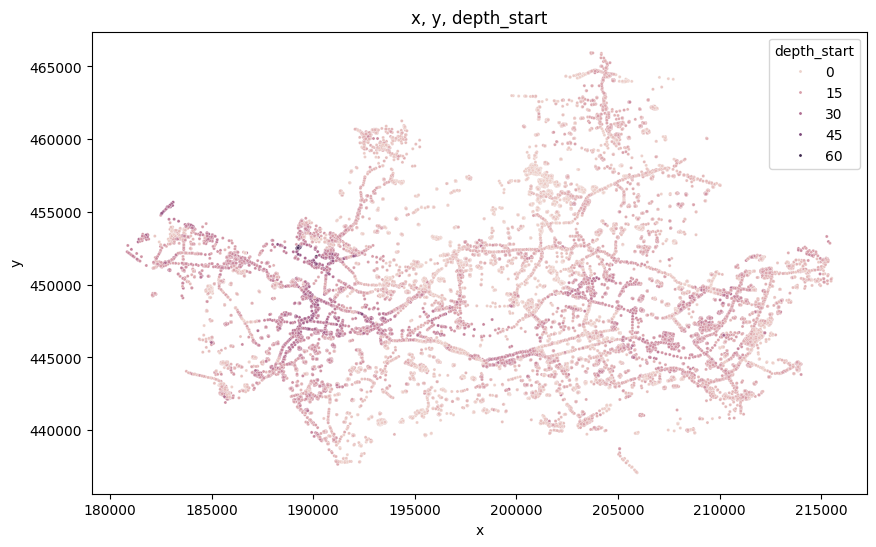

In [10]:
eda_utils.scatter_relation(df_v, 'x', 'y', 5, 'x, y, depth_start','depth_start')

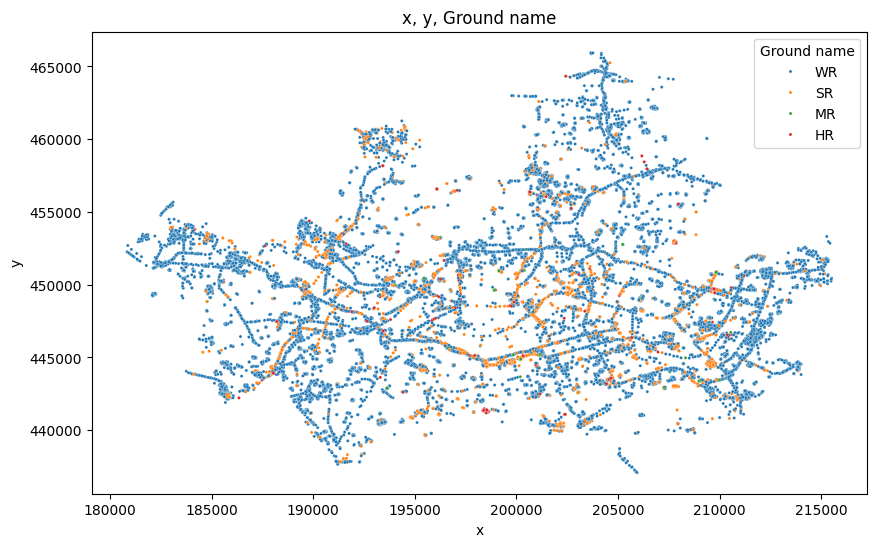

In [11]:
eda_utils.scatter_relation(df_v, 'x', 'y', 5, 'x, y, Ground name','Ground name')

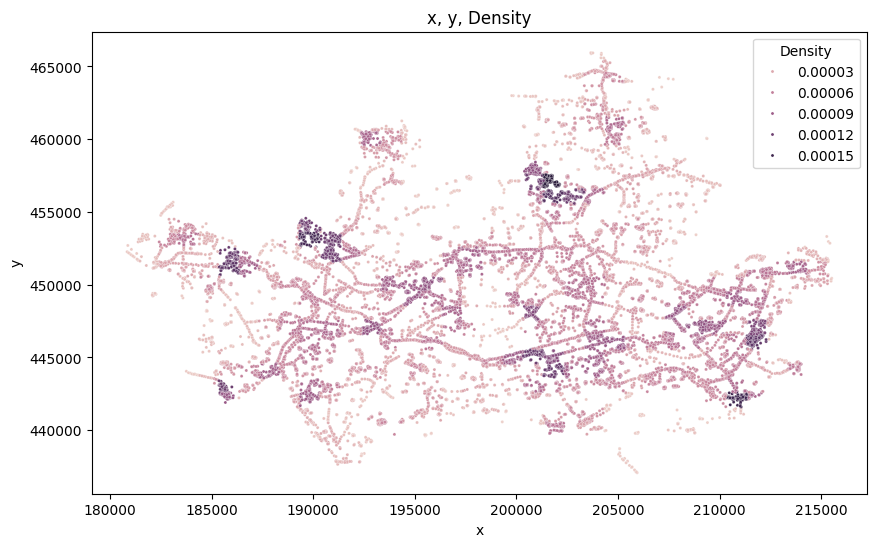

In [12]:
eda_utils.scatter_relation(df_v, 'x', 'y', 5, 'x, y, Density','Density')

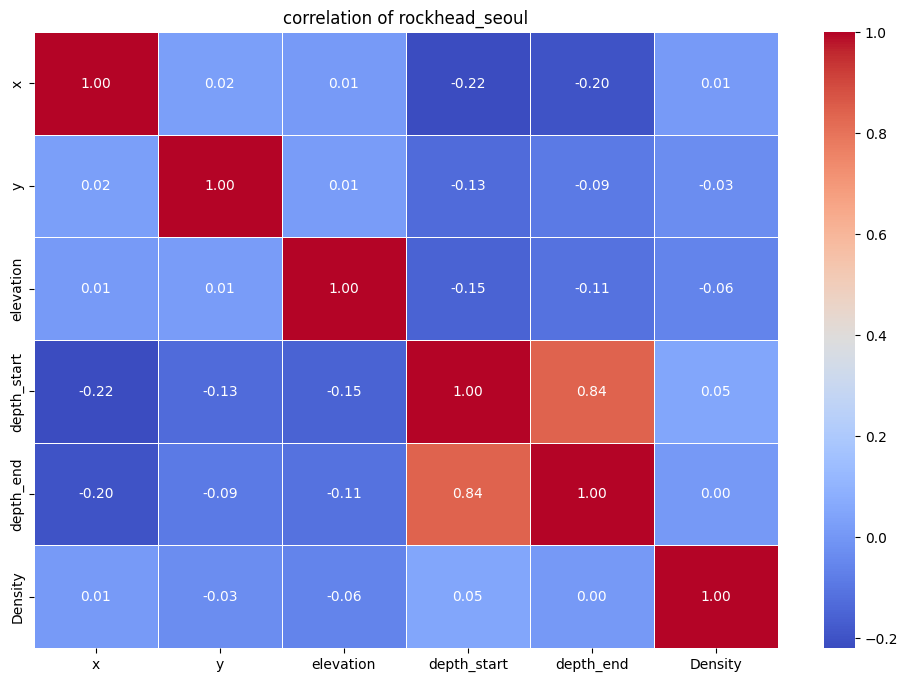

In [13]:
eda_utils.correlation_matrix(df_v, 'correlation of rockhead_seoul', drop_column='borehole_code')

<Figure size 1000x1000 with 0 Axes>

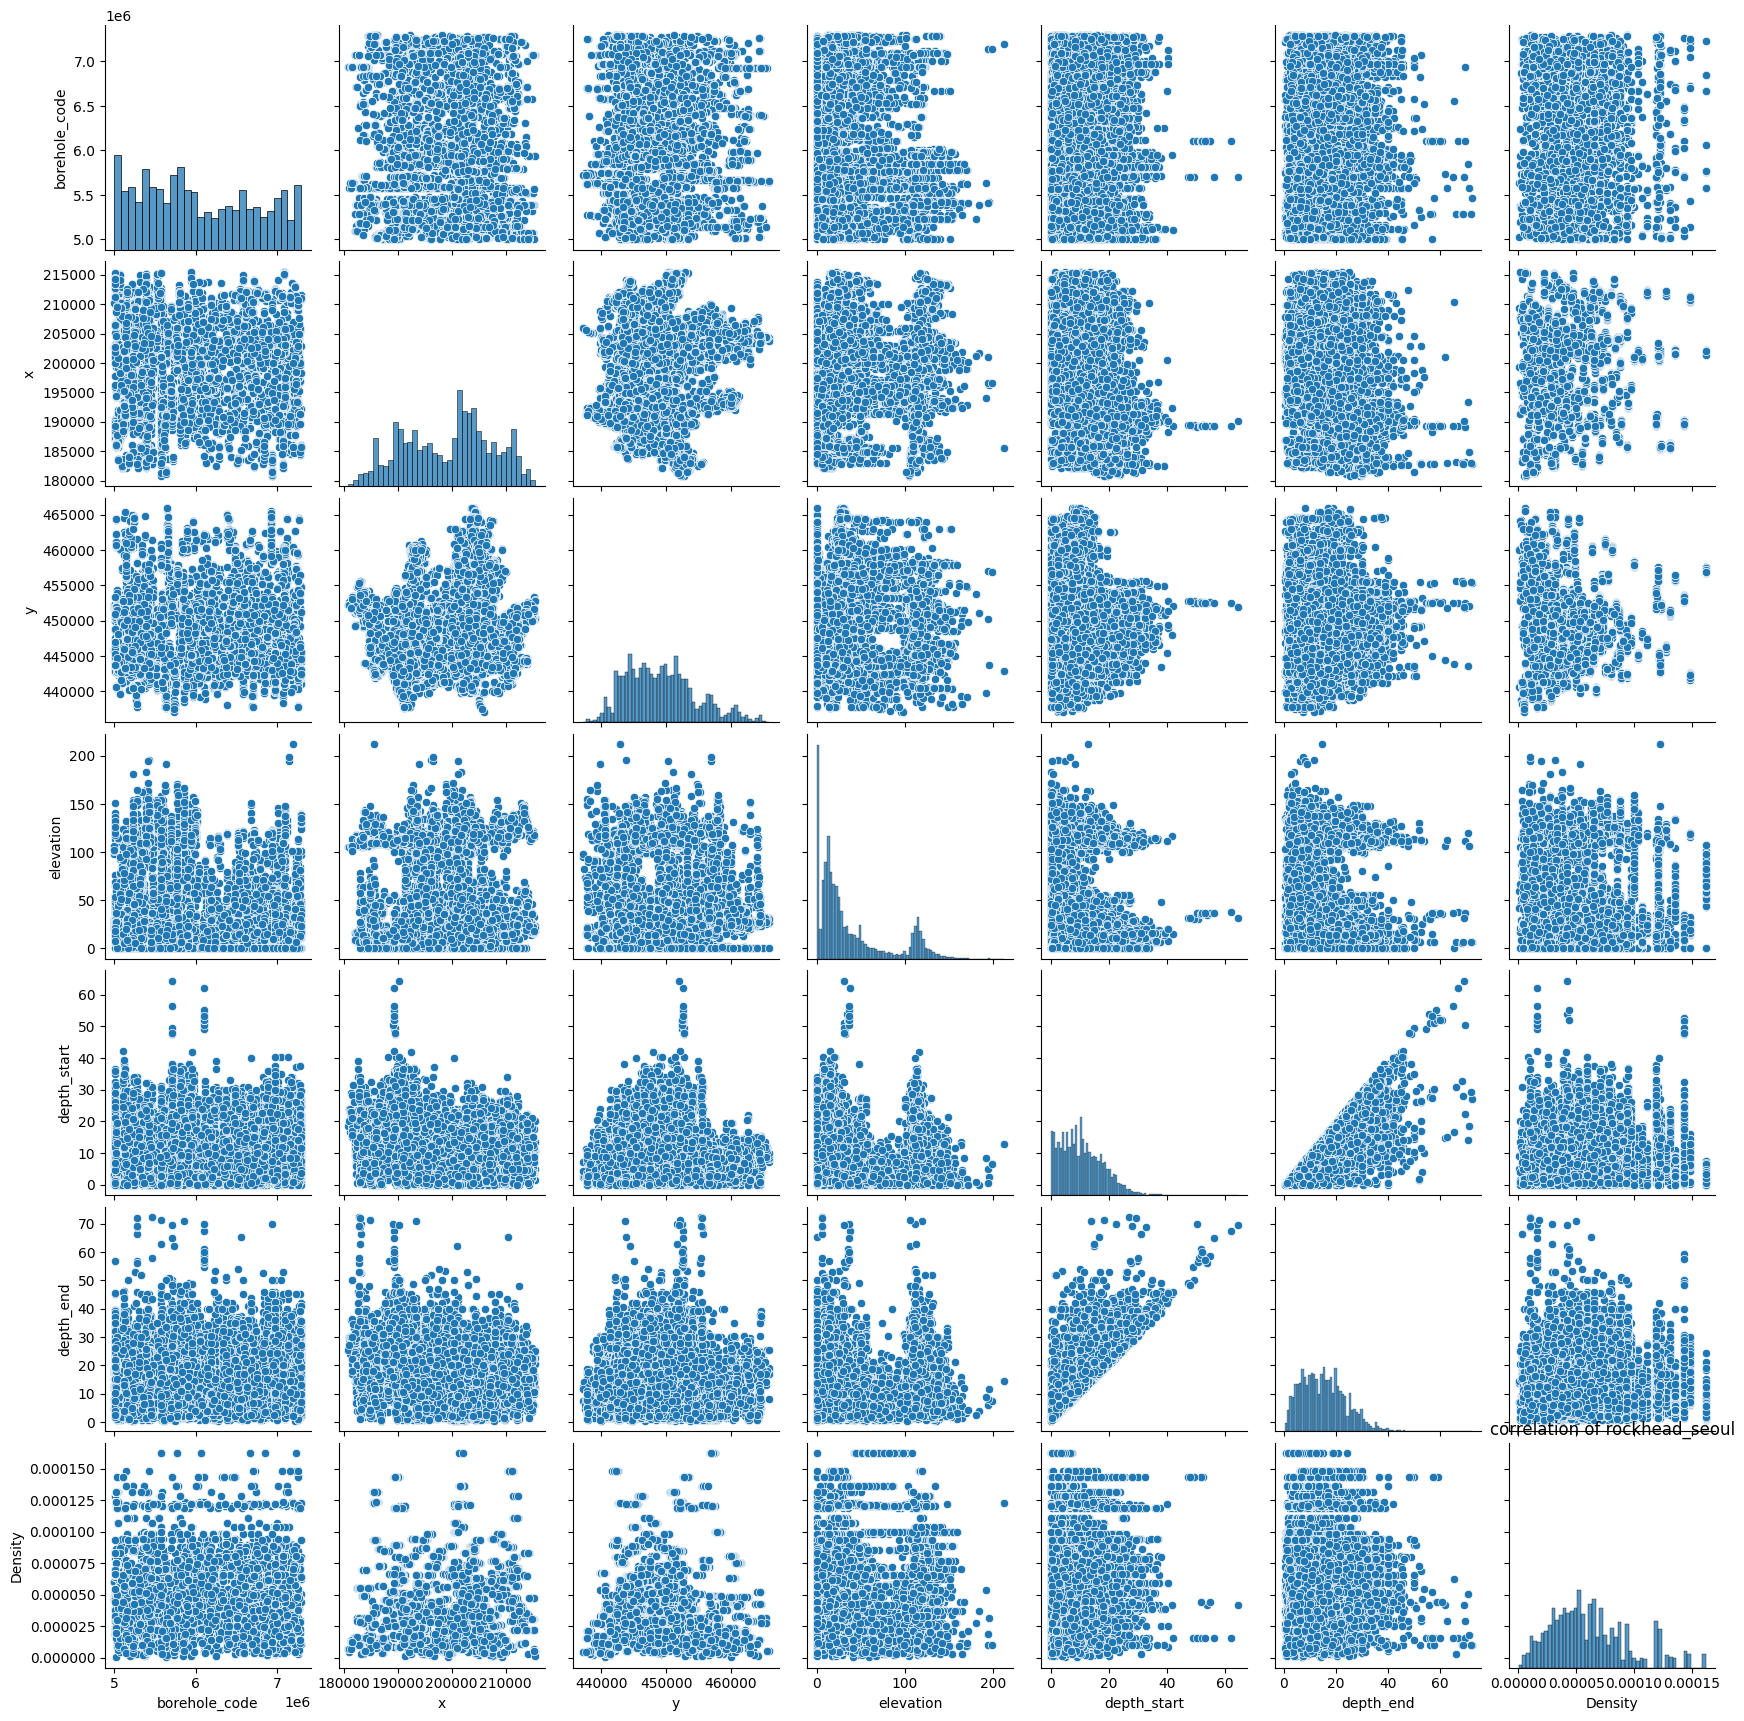

In [14]:
eda_utils.pairplot(df_v, 'correlation of rockhead_seoul', drop_column='borehole_code')

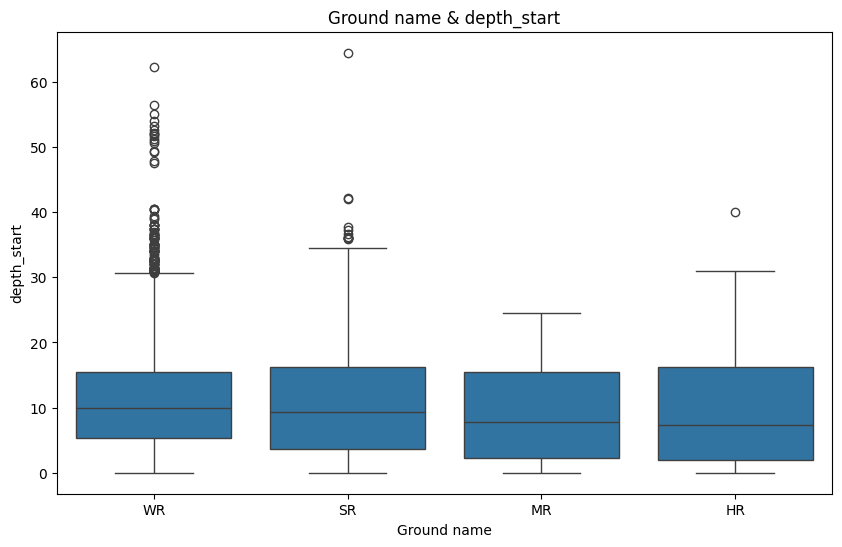

In [15]:
eda_utils.box_plot(df_v, 'Ground name', 'depth_start', 'Ground name & depth_start')

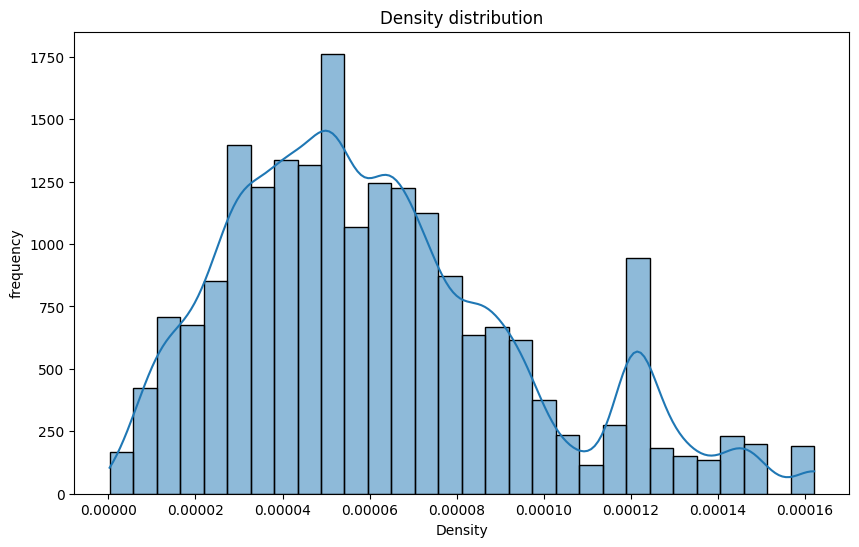

In [16]:
#depth distribution
eda_utils.distribution_histogram(df_v, 'Density', 'Density distribution')

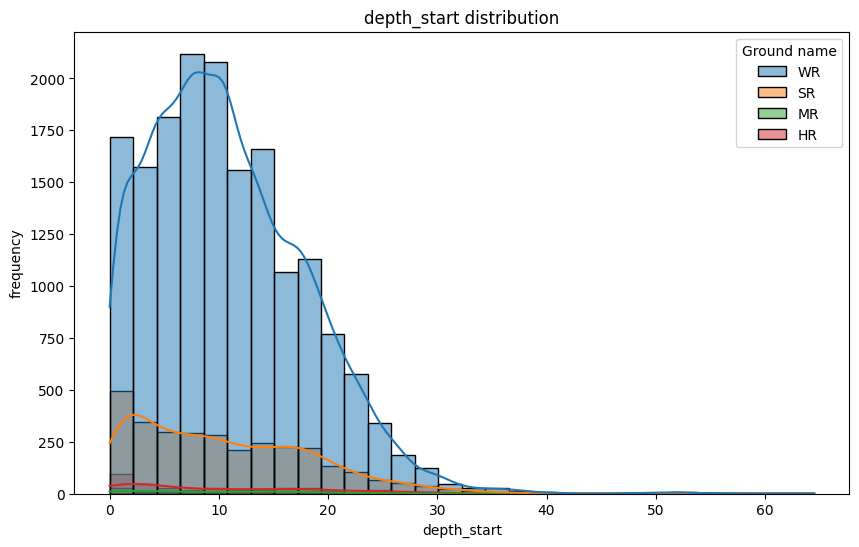

C:\Users\user\AppData\Local\Temp\ipykernel_30088\4183461730.py:4: RuntimeWarning: divide by zero encountered in log
  df_v['log_depth_start'] = pd.Series(np.log(df_v['depth_start'].to_numpy()))


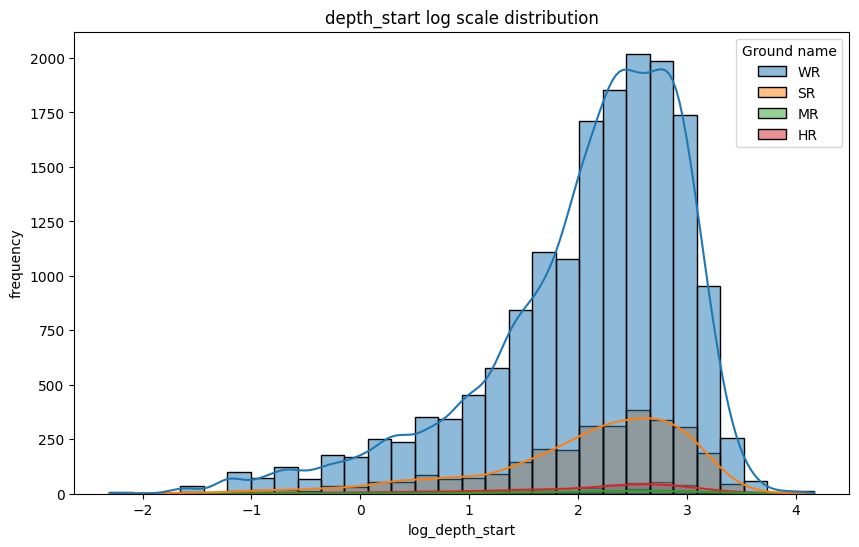

In [17]:
#elevation log scale distribution
eda_utils.distribution_histogram(df_v, 'depth_start', 'depth_start distribution', 'Ground name')

df_v['log_depth_start'] = pd.Series(np.log(df_v['depth_start'].to_numpy()))
eda_utils.distribution_histogram(df_v, 'log_depth_start', 'depth_start log scale distribution', 'Ground name')

## Data Split
- Train-Validation-Test: [8:1:1]

In [18]:
# replace

def density_norm(df):

    # normalize
    density_mean, density_std = df['Density'].mean(), df['Density'].std()
    df['Density'] = (df['Density']-density_mean)/density_std

    return df

In [19]:
df = density_norm(df)
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_30088\2590634848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Density'] = (df['Density']-density_mean)/density_std


,borehole_code,x,y,elevation,depth_start,depth_end,Ground name,Density
0,5775003,198786.1341,455129.3072,130.24,0.8,1.6,WR,-1.533692
1,5324005,202433.0902,449827.9904,16.20,10.5,12.5,SR,0.342504
2,6375003,190903.2008,446277.2003,0.00,8.9,20.0,WR,0.108710
3,5116013,192760.4519,449447.8802,3.59,2.9,10.5,WR,-0.975509
4,6230002,197220.4777,451612.4232,27.40,2.5,16.0,WR,0.272366


In [20]:
# make bin
den_min = df['Density'].min()
den_max = df['Density'].max()

den_gap = (den_max-den_min)/30

df_o = df.reset_index().copy()

df_o['den_bin'] = (df_o['Density']-den_min)//den_gap

print(df_o.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20359 entries, 0 to 20358
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          20359 non-null  int64  
 1   borehole_code  20359 non-null  int64  
 2   x              20359 non-null  float64
 3   y              20359 non-null  float64
 4   elevation      20359 non-null  float64
 5   depth_start    20359 non-null  float64
 6   depth_end      20359 non-null  float64
 7   Ground name    20359 non-null  object 
 8   Density        20359 non-null  float64
 9   den_bin        20359 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.6+ MB
None


In [21]:
df_o.groupby('den_bin').count()

,index,borehole_code,x,y,elevation,depth_start,depth_end,Ground name,Density
den_bin,,,,,,,,,
0.0,169,169,169,169,169,169,169,169,169
1.0,422,422,422,422,422,422,422,422,422
2.0,708,708,708,708,708,708,708,708,708
3.0,675,675,675,675,675,675,675,675,675
4.0,850,850,850,850,850,850,850,850,850
5.0,1398,1398,1398,1398,1398,1398,1398,1398,1398
6.0,1229,1229,1229,1229,1229,1229,1229,1229,1229
7.0,1338,1338,1338,1338,1338,1338,1338,1338,1338
8.0,1317,1317,1317,1317,1317,1317,1317,1317,1317


In [22]:
df_org_test = pd.DataFrame(columns=df_o.columns)

for i in range(0,31):
    num = int(df_o[df_o['den_bin'] == i].shape[0]*0.1)
    df_ot_i = (df_o[df_o['den_bin'] == i]).sample(n=num, random_state=1,replace=False)

    df_org_test = pd.concat([df_org_test, df_ot_i])

print(df_org_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2022 entries, 5512 to 3933
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2022 non-null   object 
 1   borehole_code  2022 non-null   object 
 2   x              2022 non-null   float64
 3   y              2022 non-null   float64
 4   elevation      2022 non-null   float64
 5   depth_start    2022 non-null   float64
 6   depth_end      2022 non-null   float64
 7   Ground name    2022 non-null   object 
 8   Density        2022 non-null   float64
 9   den_bin        2022 non-null   float64
dtypes: float64(7), object(3)
memory usage: 173.8+ KB
None


C:\Users\user\AppData\Local\Temp\ipykernel_30088\189024774.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_org_test = pd.concat([df_org_test, df_ot_i])


In [23]:
df_o = pd.merge(df_o, df_org_test, how='outer', indicator=True)
df_o = df_o.query('_merge == "left_only"').drop(columns=['_merge'])

print(df_o.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18337 entries, 0 to 20358
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          18337 non-null  object 
 1   borehole_code  18337 non-null  object 
 2   x              18337 non-null  float64
 3   y              18337 non-null  float64
 4   elevation      18337 non-null  float64
 5   depth_start    18337 non-null  float64
 6   depth_end      18337 non-null  float64
 7   Ground name    18337 non-null  object 
 8   Density        18337 non-null  float64
 9   den_bin        18337 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.5+ MB
None


In [24]:
df_org_val = pd.DataFrame(columns=df_o.columns)

for i in range(0,31):
    num = int(df_o[df_o['den_bin'] == i].shape[0]*(1/9))
    df_ov_i = (df_o[df_o['den_bin'] == i]).sample(n=num, random_state=1, replace=False)

    df_org_val = pd.concat([df_org_val, df_ov_i])

print(df_org_val.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2024 entries, 7497 to 14788
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2024 non-null   object 
 1   borehole_code  2024 non-null   object 
 2   x              2024 non-null   float64
 3   y              2024 non-null   float64
 4   elevation      2024 non-null   float64
 5   depth_start    2024 non-null   float64
 6   depth_end      2024 non-null   float64
 7   Ground name    2024 non-null   object 
 8   Density        2024 non-null   float64
 9   den_bin        2024 non-null   float64
dtypes: float64(7), object(3)
memory usage: 173.9+ KB
None


C:\Users\user\AppData\Local\Temp\ipykernel_30088\1066895895.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_org_val = pd.concat([df_org_val, df_ov_i])


In [25]:
df_org_train = pd.merge(df_o, df_org_val, how='outer', indicator=True)
df_org_train = df_org_train.query('_merge == "left_only"').drop(columns=['_merge'])

print(df_org_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16313 entries, 0 to 18336
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          16313 non-null  object 
 1   borehole_code  16313 non-null  object 
 2   x              16313 non-null  float64
 3   y              16313 non-null  float64
 4   elevation      16313 non-null  float64
 5   depth_start    16313 non-null  float64
 6   depth_end      16313 non-null  float64
 7   Ground name    16313 non-null  object 
 8   Density        16313 non-null  float64
 9   den_bin        16313 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.4+ MB
None


In [26]:
df_org_train = df_org_train.drop(['index', 'den_bin'],axis=1)
df_org_val = df_org_val.drop(['index', 'den_bin'],axis=1)
df_org_test = df_org_test.drop(['index', 'den_bin'],axis=1)

In [27]:
df_org_train.to_csv('data/240907_Rockhead_Seoul_train(false, before_aumentation).csv', index=False)
df_org_val.to_csv('data/240907_Rockhead_Seoul_val(false, before_aumentation).csv', index=False)
df_org_test.to_csv('data/240907_Rockhead_Seoul_test(false, before_aumentation).csv', index=False)